https://towardsdatascience.com/predict-customer-churn-in-python-e8cd6d3aaa7

In [1]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [2]:
import pandas as pd
import seaborn as sns


dataset = pd.read_csv('BankChurners.csv')

In [3]:
dataset.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [4]:
dataset.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [5]:
dataset = dataset.rename(
    columns= {
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1':'Long1',
        'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2':'Long2'})

In [6]:
dataset.dtypes

CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
Long1                       float64
Long2                       float64
dtype: object

2


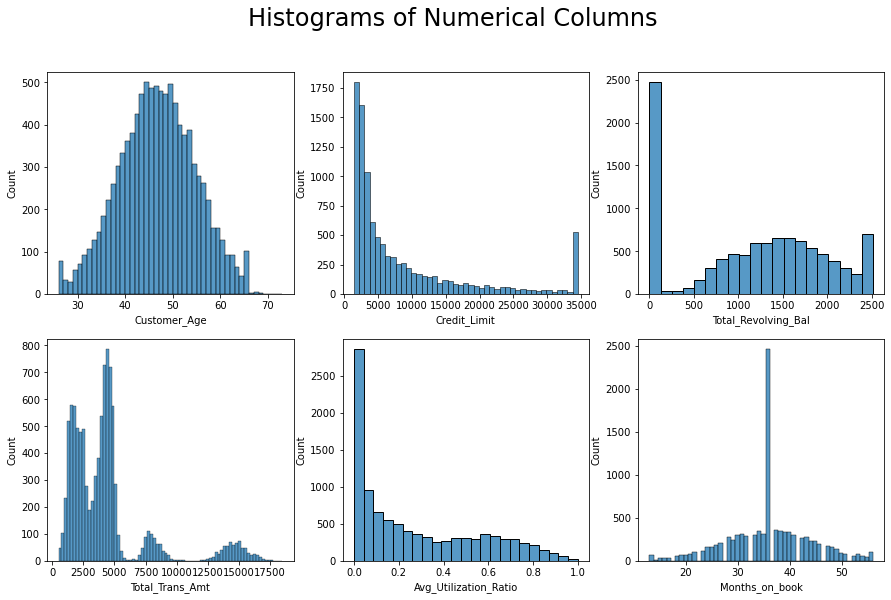

In [70]:
columns = ['Customer_Age', 'Credit_Limit' ,'Total_Revolving_Bal','Total_Trans_Amt','Avg_Utilization_Ratio','Months_on_book']


norow = int(round(len(columns)/3,0))
print (norow)

fiq, ax = plt.subplots(norow, 3, figsize=(15,9))


plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")

for i,d in enumerate(columns):
     #print (i,d)
     if i < 3:
         chart = sns.histplot(x=dataset.loc[:,d], data=dataset, ax=ax[0,i])
     else:
         chart = sns.histplot(x=dataset.loc[:,d], data=dataset, ax=ax[1,i-6])   
        
        #chart.set(title='Tips Bar Plot Default (Avg)')

# Exploratory Data Analysis 

From the above numerical data visualisation, we can see the following observation about the customers :
    * Average age of the customers is 46 years old.
    * Max credit limit is up to $35k though 75% of customers have credit limit less than $11k.
    * Most customers have zero revolving balance at the end of billing cycle.
    * Those customers who have revolving balances, the average is about $1.5k.
    * Average transaction amounts is $4.4k where about 75% of customers falling within this boundary.
    * The average utilisation of credit limit is about 0.27%. 
    * Most customers stay with the bank for about 36 weeks.
       

Further questions to ask regarding the attrition :
    * Those customers who have zero revolving balances, do they actually use their cards or they are being discipline?
    * What are the profiles for those customers who have revolving balances? Are they the ones who left the bank?
    * Is there any link between avg utilisation ratio and attrition rate?
    * Can we also see from total transaction amounts if we can determine which customers will leave the bank?
    

In [79]:
dataset['Months_on_book'].describe()


count    10127.000000
mean        35.928409
std          7.986416
min         13.000000
25%         31.000000
50%         36.000000
75%         40.000000
max         56.000000
Name: Months_on_book, dtype: float64

In [ ]:
df['Gender'].unique()

In [ ]:
df['Gender'].nunique()

In [ ]:
dataset["Attrition_Flag"].value_counts()

In [ ]:
dataset.dtypes


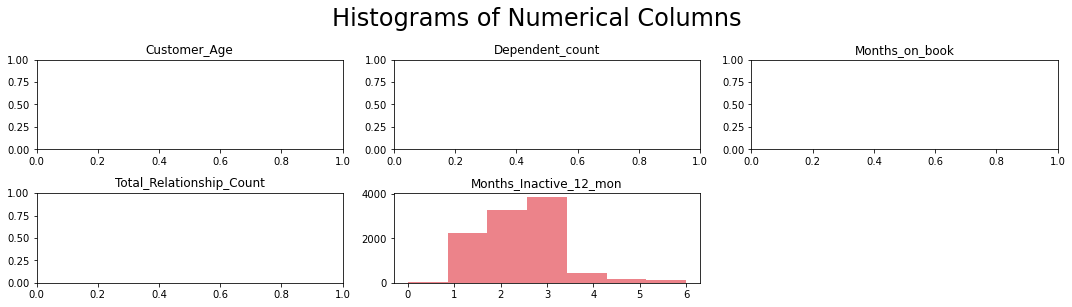

In [30]:
dataset2 = dataset[['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count',
                   'Months_Inactive_12_mon']]
#Histogram:
    
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
plt.hist(dataset2.iloc[:, i], bins=vals, color = '#ec838a')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


In [ ]:
print (dataset.isna().any())

print (dataset.isna().sum())

In [ ]:
#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique  values
le_count = 0
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 2:
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

In [ ]:
dataset.info()

In [ ]:
df[['Customer_Age','Credit_Limit']].describe()

NameError: name 'df' is not defined

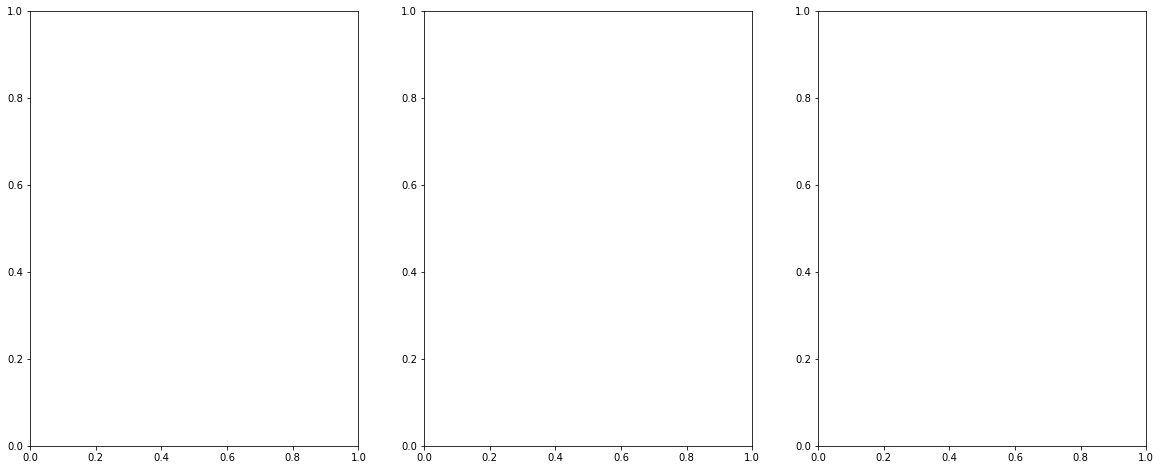

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# create fig and subplots
fig, ax = plt.subplots(1,3,figsize=(20,8))
     
chart1 = sns.countplot(ax=ax[0],data=df,x='Dependent_count',order = df['Dependent_count'].value_counts().index)     
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)  

chart2 = sns.countplot(ax=ax[1],data=df,x='Education_Level',order = df['Education_Level'].value_counts().index)  
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)  

chart3 = sns.countplot(ax=ax[2],data=df,x='Marital_Status',order = df['Marital_Status'].value_counts().index)    
chart3.set_xticklabels(chart3.get_xticklabels(), rotation=90)  


plt.show()

NameError: name 'df' is not defined

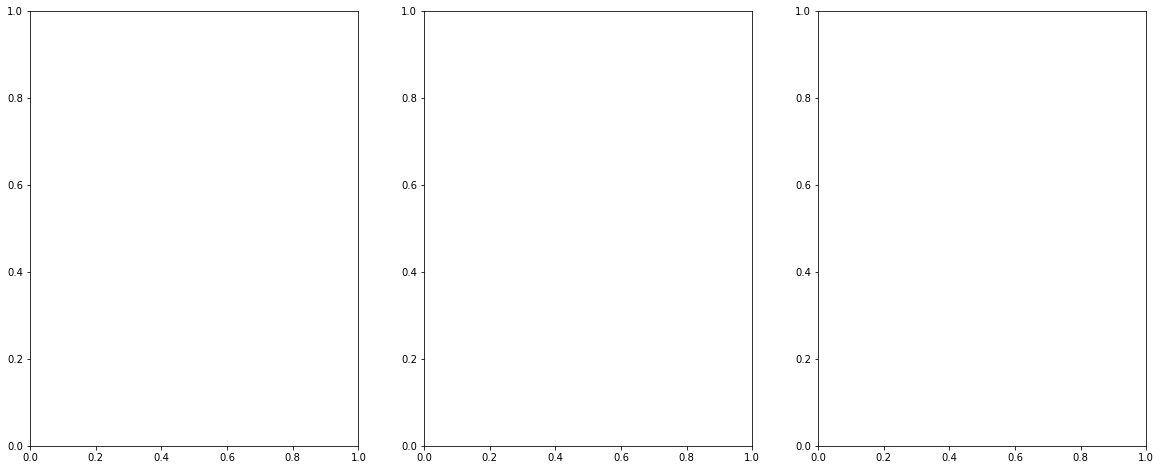

In [60]:
# create fig and subplots
fig, ax = plt.subplots(1,3,figsize=(20,8))
     

sns.countplot(ax=ax[0],data=df,x='Dependent_count',hue='Attrition_Flag',order = df['Dependent_count'].value_counts().index)     
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=90)  

chart2 = sns.countplot(ax=ax[1],data=df,x='Education_Level',hue='Attrition_Flag',order = df['Education_Level'].value_counts().index)  
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)  

chart3 = sns.countplot(ax=ax[2],data=df,x='Marital_Status',hue='Attrition_Flag',order = df['Marital_Status'].value_counts().index)    
chart3.set_xticklabels(chart3.get_xticklabels(), rotation=90)  

plt.show()

In [ ]:
chart2 = sns.countplot(data=df,x='Income_Category',hue = 'Attrition_Flag', order = df['Income_Category'].value_counts().index)  
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)  

plt.show()

In [ ]:
#penguins = sns.load_dataset("penguins")
plt.subplots(figsize=(20, 10))
sns.histplot(data=df, x="Credit_Limit",hue='Card_Category')

plt.show()

**What is the main issue?**

The main issue is to figure out what type of customers deciding to churn out and what type of products impacted by these customers. Based on this finding, we can determine if we have issues with our products offering and if we have to change our strategy.


